## 函数

In [1]:
page_hero = '''<ul class="herolist clearfix"><li><a href="herodetail/194.shtml" target="_blank"><img src="http://game.gtimg.cn/images/yxzj/img201606/heroimg/194/194.jpg" width="91px" alt="苏烈">苏烈</a></li><li><a href="herodetail/195.shtml" target="_blank"><img src="http://game.gtimg.cn/images/yxzj/img201606/heroimg/195/195.jpg" width="91px" alt="百里玄策">百里玄策</a></li><li><a href="herodetail/196.shtml" target="_blank"><img src="http://game.gtimg.cn/images/yxzj/img201606/heroimg/196/196.jpg" width="91px" alt="百里守约">百里守约</a></li><li><a href="herodetail/193.shtml" target="_blank"><img src="http://game.gtimg.cn/images/yxzj/img201606/heroimg/193/193.jpg" width="91px" alt="铠">铠</a></li></ul>
'''
page_hero

'<ul class="herolist clearfix"><li><a href="herodetail/194.shtml" target="_blank"><img src="http://game.gtimg.cn/images/yxzj/img201606/heroimg/194/194.jpg" width="91px" alt="苏烈">苏烈</a></li><li><a href="herodetail/195.shtml" target="_blank"><img src="http://game.gtimg.cn/images/yxzj/img201606/heroimg/195/195.jpg" width="91px" alt="百里玄策">百里玄策</a></li><li><a href="herodetail/196.shtml" target="_blank"><img src="http://game.gtimg.cn/images/yxzj/img201606/heroimg/196/196.jpg" width="91px" alt="百里守约">百里守约</a></li><li><a href="herodetail/193.shtml" target="_blank"><img src="http://game.gtimg.cn/images/yxzj/img201606/heroimg/193/193.jpg" width="91px" alt="铠">铠</a></li></ul>\n'

In [ ]:
page_hero[81]

In [64]:
start_link=page_hero.find('<img src="')
start_link

81

In [7]:
start_quote=page_hero.find('"',start_link)#从start_link位置开始搜索
start_quote

90

In [8]:
end_quote =page_hero.find('"',start_quote+1)
end_quote

153

In [11]:
page_hero[start_quote+1:end_quote]

'http://game.gtimg.cn/images/yxzj/img201606/heroimg/194/194.jpg'

In [12]:
end_bracket =page_hero.find('>',end_quote+1)
start_bracket =page_hero.find('<',end_bracket+1)
page_hero[end_bracket+1:start_bracket]

'苏烈'

### 函数

In [20]:
def extract_hero_and_image(current_page):
    start_link = current_page.find('<img src="')
    start_quote = current_page.find('"',start_link)
    end_quote = current_page.find('"',start_quote+1)
    current_page[start_quote+1:end_quote]
    end_bracket = current_page.find('>',end_quote+1)
    start_bracket = current_page.find('<',end_bracket+1)
    print(current_page[start_quote+1:end_quote])
    print(current_page[end_bracket+1:start_bracket])
    return start_bracket

In [22]:
entry_sulie=extract_hero_and_image(page_hero)

http://game.gtimg.cn/images/yxzj/img201606/heroimg/194/194.jpg
苏烈


In [23]:
entry_sulie

179

In [24]:
page_hero=page_hero[entry_sulie:]
entry_xuance=extract_hero_and_image(page_hero)

http://game.gtimg.cn/images/yxzj/img201606/heroimg/195/195.jpg
百里玄策


In [26]:
def do_nothing(): #定义空函数
    pass
type(do_nothing)

function

In [29]:
def greeting():
    print("Hello Python")

# Call the function
a = greeting()
print(a)

Hello Python
None


In [ ]:
# A function with a parameter and return a string
def greeting_str(name):
    return "Hello again " + name

# Use the function
s = greeting_str("Joshua")
print(s)

### Positional Arguments¶

In [1]:
# A function with 3 parameters
def menu(wine, entree, dessert):
    return "wine:{},entree:{},dessert:{}".format(wine,entree,dessert)

# Get a menu
menu('chardonnay', 'chicken', 'cake')

'wine:chardonnay,entree:chicken,dessert:cake'

### Keyword Arguments

In [2]:
menu(entree='beef', dessert='cake', wine='bordeaux')

'wine:bordeaux,entree:beef,dessert:cake'

### Default Parameter Values

In [3]:
# default dessert is pudding
def menu(wine, entree, dessert='pudding'):
    return "wine:{},entree:{},dessert:{}".format(wine,entree,dessert)


# Call menu without providing dessert
menu('chardonnay', 'chicken')

'wine:chardonnay,entree:chicken,dessert:pudding'

In [4]:
# Default value will be overwritten if caller provide a value
menu('chardonnay', 'chicken', 'doughnut')

'wine:chardonnay,entree:chicken,dessert:doughnut'

### Gather Positional Arguments with *¶

In [ ]:
def print_args(*args): #*args是个元组,可以传入很多参数
    print('Positional args:', args)
print_args(1,2,3,'hello',)

In [6]:
def print_args_with_required(req1, req2, *args):
    print('required arg 1:', req1)
    print('required arg 2:', req2)
    print('All other args:', args)
print_args_with_required(1,2,3,4,5,6,7)

required arg 1: 1
required arg 2: 2
All other args: (3, 4, 5, 6, 7)


### Gather Keyword Arguments with **

In [4]:
def print_kwargs(**kwargs): #**kwargs 是个字典
    print('Keyword args:', kwargs) 
print_kwargs(first=1,second=2,key=123) # key : value

Keyword args: {'first': 1, 'second': 2, 'key': 123}


In [6]:
def print_all_args(req1, *args, **kwargs): #要按先reql,再元组，之后再字典的顺序
    print('required arg1:', req1)
    print('Positional args:', args)
    print('Keyword args:', kwargs)
print_all_args(1,2,3,key=123)

required arg1: 1
Positional args: (2, 3)
Keyword args: {'key': 123}


### Docstrings

In [12]:
def print_if_true(thing, check):
    '''
    Prints the first argument if the seconde argument is true.
    The operation is:
        1. Check whther the *second* argument is true
        2. If it is, print the *first* argument.   
    '''
    if check:
        print(thing)
        
# Use help to get the docstring of a function
help(print_if_true)

print_if_true(1,1)

Help on function print_if_true in module __main__:

print_if_true(thing, check)
    Prints the first argument if the seconde argument is true.
    The operation is:
        1. Check whther the *second* argument is true
        2. If it is, print the *first* argument.

1


In [8]:
?print_if_true

In [17]:
# We can also get the raw docstrint by using __doc__ 
print(print_if_true.__doc__)


    Prints the first argument if the seconde argument is true.
    The operation is:
        1. Check whther the *second* argument is true
        2. If it is, print the *first* argument.   
    


## 代码结构
### 以下程序哪里错误了, 并给出修改意见

In [ ]:
smallest = 0
inputStr = input("Enter a value: ")
while inputStr != "" :
    value = int(inputStr)
    if value < smallest :
        smallest = value
    inputStr = input("Enter a value: ")
print(smallest)

In [2]:
# 修改建议
smallest = 0
inputStr = input("Enter a value: ")
print('smallest:',smallest)
while inputStr != "" :
    value = int(inputStr)
    if value < smallest :
        smallest = value
    print('after:',value,smallest)
    inputStr = input("Enter a value: ")
print(smallest)

Enter a value: 100
smallest: 0
after: 100 0
Enter a value: -1
after: -1 -1
Enter a value: 
-1


#### 做一个简单的可以加，减，乘，除的计算器

In [ ]:
# This function adds two numbers 
def add(x, y):
    return x + y

# This function subtracts two numbers 
def subtract(x, y):
    return x - y

# This function multiplies two numbers
def multiply(x, y):
    return x * y

# This function divides two numbers
def divide(x, y):
    return x / y

print("Select operation.")
print("1.Add")
print("2.Subtract")
print("3.Multiply")
print("4.Divide")

# Take input from the user 
choice = input("Enter choice(1/2/3/4):")

num1 = int(input("Enter first number: "))
num2 = int(input("Enter second number: "))

if choice == '1':
    print(num1,"+",num2,"=", add(num1,num2))
elif choice == '2':
    print(num1,"-",num2,"=", subtract(num1,num2))

elif choice == '3':
    print(num1,"*",num2,"=", multiply(num1,num2))

elif choice == '4':
    print(num1,"/",num2,"=", divide(num1,num2))
else:
    print("Invalid input")

#### 计算你银行带来的回报，假设你存银行一笔钱是10000，年利率是5%，则计算20年后，变成了多少钱？打印每一年的变化

In [ ]:
# Define constant variables.
RATE = 5.0
INITIAL_BALANCE = 10000.0

# Print the table of balances for each year.
balance = INITIAL_BALANCE

bal_records =[]

#your solution below
for year in range(1,21):
    interest=balance*(RATE/100)
    balance=balance + interest
    print("interest:{},balance:{}".format(interest,balance))
    bal_records.append(balance) 

In [ ]:
bal_records

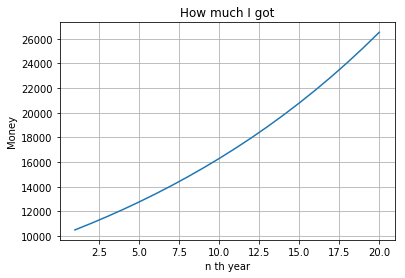

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot([i for i in range(1, 20+1)],bal_records)   #在画布上画图
ax.set(xlabel='n th year', ylabel='Money',title='How much I got')
ax.grid()

plt.show()  #显示画布

### 判卷
我们来帮助数学老师判卷子，本次数学题一共11到，已经知道正确答案分别是"adbdcacbdac"，请根据正确答案，找出学生的错误
并且请给出最终分数。

In [14]:
# Define a string containing the correct answers.
CORRECT_ANSWERS = "adbdcacbdac"
# Obtain the user’s answers, and make sure enough answers are provided.
done = False

#your solution here
while not done:
    userAnswers = input('Enter your answer:')
    if len(userAnswers)==len(CORRECT_ANSWERS):
        done = True
    else:
        print('Length is not equal')

NumQuestion=len(CORRECT_ANSWERS)
numCorrect=0
results=''

for i in range(NumQuestion):
    if userAnswers[i]== CORRECT_ANSWERS[i]:
        numCorrect = numCorrect+1
        results = results + userAnswers[i]
    else:
        results=results+'X'
score= round(numCorrect / NumQuestion * 100)
        
if score == 100 :
    print("Perfect")
else :
    print("You missed %d questions: %s" % (NumQuestion - numCorrect, results))
    print("Your score is: %d percent" % score)

Enter your answer:adcdcacbdac
You missed 1 questions: adXdcacbdac
Your score is: 91 percent


### 计算$\pi$值

$$
\frac{\pi}{4} = 1-\frac{1}{3}+\frac{1}{5}-\frac{1}{7}+\frac{1}{9}+…
$$

In [19]:
pi_estimate = 0
flag = 0
#your solution
for i in range(1,100000):
    if i%2!=0:
        if flag == 0:
            pi_estimate+=1/i
            flag=1
        else:
            pi_estimate-=1/i
            flag=0

#

print(pi_estimate*4)
    

3.1415726535897814


### 方法二: 蒙特卡洛模拟
想象一个圆形靶子，我们不停的向靶面射击, 命名圆内的我们算是“击中 也就是 $x^2 + y^2 ≤ 1$.<br/>
假如我们不停的射击，直到我们把这个方形的靶子全部覆盖(打成了骰子)<br/>
圆的面积应该是$$ S_{circle} = \pi r^2 $$
方形的面积应该是$$ S_{square} = a^2 $$
也就是说 $$ S_{circle} /  S_{square} = \pi r^2 / a^2$$
$$ r = 1, a =2 $$
hits / tries is approximately equal to the ratio of the areas
of the circle
那么$$ S_{circle} /  S_{square} = \pi / 4$$
那么预估的$$\pi = 4 \times (S_{circle} /  S_{square})$$
![](circle.png)

In [1]:
from random import random #random()随机产生0-1数字
TRIES = 10000000
hits = 0

# your solution
for i in range(TRIES):
    r=random()
    x=-1+2*r
    r=random()
    y=-1+2*r
    if x*x +y*y <=1:
        hits=hits+1

piEstimate = 4.0 * hits / TRIES
print("Estimate for pi:", piEstimate)

Estimate for pi: 3.1416328


### 单位转换？
```
问题是什么                Problem
我们有什么                Input
我们想要得到什么           Output
尝试最简单的方法           Simple Solution
看看如何改进              Develop Incrementally
```

#### 把cm 转换成 m
1. input 是 cm
2. 想要 output 是 m
3. 要是0呢

```
def converter(value):
    return converted_value
```

In [6]:
def convertor (value):
    convert_value = value /100
    return convert_value

In [7]:
convertor(100)

1.0

How about inches ?<br/>
1 cm = 0.3937 inches

In [11]:
#cm -> inch
def convertor (value):
    convert_value = value*0.3937
    return convert_value

In [12]:
print(convertor(10))

3.937


#### 稍微improve一点后

In [22]:
def convertor (value,to_unit='m'):
    convert_value=0
    if to_unit=='m':
        convert_value=value/100
    else:
        convert_value = value*0.3937
    return convert_value

In [14]:
print(convertor(10),'m')

0.1 m


In [20]:
# improve a little
def convertor (value,to_unit='m'):
    convert_value=0
    if to_unit=='m':
        convert_value=value/100
    elif to_unit=='in':
        convert_value = value*0.3937
    else:
        print('Unknown Unit')
    return convert_value

In [21]:
print(convertor(10,'kg'))

Unknown Unit
0


#### 相互转换呢？

In [ ]:
# improve a little
def convertor (value,from_unit='cm',to_unit='m'):
    convert_value=0
    if from_unit=='cm and 'to_unit=='m':
        convert_value=value/100
    elif from_unit=='m' and to_unit=='cm':
        convert_value = value*100    
    elif from_unit=='cm' and to_unit=='in':
        convert_value = value*0.3937
    elif from_unit=='in' and to_unit=='cm':
        convert_value = value/0.3937
    else:
        print('Unknown Unit')
    return convert_value

### 感觉越来越累, try to make more general
try lambda

In [24]:
cm2m = lambda value :  value / 100
cm2in = lambda value : value * 0.3937
m2cm = lambda value :  value * 100
in2cm = lambda value : value / 0.3937

unit_converter={
    'cm':{
        'm':cm2m,
        'in':cm2in},
    'm':{
        'cm':m2cm
    },
    'in':{
        'cm':in2cm
    }
}
unit_converter['cm']['m'](10)

0.1

### more general planning

only consider about the way factor * or /

1. from unit 转换成 base unit
2. base unit 转换成 to unit

In [30]:
sample_units = [
    ['m',1],['cm',0.01],['in',0.0254] #m是base unit
]


In [34]:
def converter(value, from_unit='cm',to_unit='m'):
    units = [['m',1],['cm',0.01],['in',0.0254]]

    ## if base unit?
    convert_value = None
    found_two = 0
    for unit in units:
        if from_unit == unit[0]:
            found_two +=1

        if to_unit == unit[0]:
            found_two +=1
            
    if found_two != 2:
        print("check your from and to unit ", found_two)
        return convert_value
    
    if from_unit != units[0][0]:
        print("conver to base unit")
        for unit in units[1:]:
            if from_unit == unit[0]:
                print("fount unit ",unit[0])
                convert_value = value * unit[1]
                print("conver to unit ",units[0][0]," value is ", convert_value)
    else:   
        convert_value = value
        
    if convert_value:
        print("from base unit to to_unit ", to_unit)
        if to_unit == units[0][0]:
            return convert_value
        
        for unit in units[1:]:
            if to_unit == unit[0]:
                print("fount unit in to ", to_unit)
                convert_value = convert_value / unit[1]

    return convert_value
        
print(converter(10,'m','in'))

ok


## 算法基础

Algorithm Analysis（从上到下运行速度越来越慢）
* log
* Linear
* log linear (当size n 变大时，运行速度会按 n* logn的速度增长)
* quadratic
* cubic
* exponential

### Big O

5N^2+22NlogN+3N #增长速度的上限是 big o of N^2

# Algorithms

In this notebook, you will learn the following:

1. Big O Notation
2. Recursion
    - Fibonacci
    - Binary Search

## Big O Notation

### $O(1)$

In [ ]:
def square(x):
    return x * x

square(3)

### $O(n)$

In [ ]:
def find_max(l):
    import time
    start = time.time()
    
    if l == None:
        return None
    mx = l[0]
    for n in l:
        if n > mx:
            mx = n
            
    t = time.time() - start
    
    return mx, len(l), t

# Modules, Packages, and Programs

In previous class, we've talked about how to organize our code into logical groups called *function*. Now, it's about time to go bigger. In this notebook, you'll learn even larger code blocks: **Moduls**, **Packages** and eventually a realistic Python **Program**.

There is a table of content for this notebook:

1. Standalone Programs
2. Command-Line Arguments
3. Modules and the `import` Statement
4. Packages
5. Python Standard Library

## Standalone Programs

### First-Class Citizens

Everthing in Python is an object, including functions. You can assign functions to variables, use them as arguments to other functions and return them from functions.

In [ ]:
def answer1():
    print("I enjoy progrmming with Python")
    
def answer2():
    print("I'm a sucker for Python")

# A function that takes another function as argument
def run_somthing(func):
    func()

run_somthing(answer1)
run_somthing(answer2)

In [20]:
def other_func():
    print('hello world!!!')

In [21]:
run_somthing(other_func)

hello world!!!


In [21]:
def hello_world(name):
    print(name)    

In [ ]:
def binary_operation(func, op1, op2):
    return func(op1, op2)
    
def add(op1, op2):
    return op1 + op2

def sub(op1, op2):
    return op1 - op2

print("1 + 2 =", binary_operation(add, 1, 2))
print("1 - 3 =", binary_operation(sub, 1, 3))

In [24]:
def exp_factory(n):
    def exp(a):
        return a ** n
    return exp

In [27]:
square = exp_factory(2)(3) #n=2,a=3
print(square)

9

In [22]:
fun_a = hello_world

In [23]:
fun_a('kelly')

kelly


#### put everything together

In [30]:
from time import clock

In [33]:
def other_opt(a,b,c):
    return a*b*c

In [36]:
from time import clock
def time(f):
    def _f(*args):
        t0 = clock() #在函数调用前记录一个时间
        f(*args)
        return clock() - t0 #在函数调用后记录一个时间
    return _f

def binary_operation(func, *arg):
    return func(*arg)
time(binary_operation)(other_opt,1,2,3)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


0.0004030000000003753

### Typing: Support for type hints

In [37]:
def greeting(name: str) -> str: #给写代码的人提示，
    return 'Hello ' + name   

### Lambda

In [24]:
def binary_operation(func,op1,op2):
    return func(op1,op2)

In [25]:
def mul(op1, op2):
    return op1 * op2

print("2 * 4 = ", binary_operation(mul, 2, 4))

2 * 4 =  8


lambda 定义匿名函数，op1,op2是参数，op1* op2是返回值

In [ ]:
binary_operation(lambda op1,op2: op1 * op2, 2, 4) #lambda op1,op2: op1 * op2，相当于定义了一个函数

##### Syntax of Lambda Function
lambda arguments: expression

Lambda functions can have any number of arguments but only one expression. The expression is evaluated and returned. Lambda functions can be used wherever function objects are required.


In [38]:
double = lambda x: x * 2

# Output: 10
double(5)

10

In [39]:
many_function=[
    (lambda x:x**2),
    (lambda x:x**3),
    (lambda x:x**4) 
]

In [42]:
print(many_function[0](2),many_function[1](2))

4 8


In [47]:
double = lambda **x: print(x) #**x是字典
double(a=1,b=2,c=3)

{'a': 1, 'b': 2, 'c': 3}


###### Example use with filter()
The filter() function in Python takes in a function and a list as arguments.

The function is called with all the items in the list and a new list is returned which contains items for which the function evaluats to True.

Here is an example use of filter() function to filter out only even numbers from a list.

In [ ]:
my_list = [1, 5, 4, 6, 8, 11, 3, 12]

new_list = list(filter(lambda x: (x%2 == 0) , my_list))

# Output: [4, 6, 8, 12]
new_list

In [51]:
my_list = [1, 5, 4, 6, 8, 11, 3, 12]

new_list = list(filter(lambda x: x==4 , my_list))

# Output: [4, 6, 8, 12]
new_list

(4,)

In [54]:
[i for i in my_list if i%2==0] #相较于filter，这个更好读

[4, 6, 8, 12]

In [ ]:
number_list = range(-5, 5)
less_than_zero = list(filter(lambda x: x < 0, number_list))
less_than_zero

##### Map
Map applies a function to all the items in an input_list.

map(function_to_apply, list_of_inputs)

In [ ]:
items = [1, 2, 3, 4, 5]
squared = []
for i in items:
    squared.append(i**2)
squared

In [56]:
items = [1, 2, 3, 4, 5]
squared = list(map(lambda x: x**2, items))
squared

[1, 4, 9, 16, 25]

In [66]:
def fahrenheit(T):
    return ((float(9)/5)*T + 32)
def celsius(T):
    return (float(5)/9)*(T-32)
temp = [36.5, 37, 37.5,39]

F = map(fahrenheit, temp)
list(F)

[97.7, 98.60000000000001, 99.5, 102.2]

In [ ]:
Celsius = [39.2, 36.5, 37.3, 37.8]
fahrenheit = map(lambda T: (float(9)/5)*T + 32 ,Celsius)
list(fahrenheit)

###### Most of the times we use lambdas with map
Instead of a list of inputs we can even have a list of functions!

In [ ]:
def multiply(x):
    return (x*x)
def add(x):
    return (x+x)

funcs = [add, multiply]
for i in range(5):
    value = list(map(lambda x: x(i), funcs))
    print(value)

##### Reduce
The function reduce(func, seq) continually applies the function func() to the sequence seq. It returns a single value. 

If seq = [ s1, s2, s3, ... , sn ], calling reduce(func, seq) works like this:

At first the first two elements of seq will be applied to func, i.e. func(s1,s2) The list on which reduce() works looks now like this: [ func(s1, s2), s3, ... , sn ]

In the next step func will be applied on the previous result and the third element of the list, i.e. func(func(s1, s2),s3)
The list looks like this now: [ func(func(s1, s2),s3), ... , sn ]

Continue like this until just one element is left and return this element as the result of reduce()

In [71]:
from functools import reduce
reduce(lambda x,y:x+y,[47,11,42,13])

113

###### Determining the maximum of a list of numerical values by using reduce:

In [72]:
f = lambda a,b: a if (a > b) else b
reduce(f, [47,11,42,102,13])

102

###### Calculating the sum of the numbers from 1 to 100

In [73]:
reduce(lambda x, y: x+y, range(1,101))

5050

### First-Class Citizens

Everthing in Python is an object, including functions. You can assign functions to variables, use them as arguments to other functions and return them from functions.

In [29]:
def answer1():
    print("Python is the best computer language!")
    
def answer2():
    print("No! PHP is the best one!")

# A function that takes another function as argument
def run_somthing(func):
    func()

In [ ]:
run_somthing(answer1)
run_somthing(answer2)

In [31]:
def exp_factory(n):
    def exp(a):
        return a ** n
    return exp

In [33]:
square = exp_factory(2)


<function __main__.exp_factory.<locals>.exp(a)>

In [34]:
square(3)

9

### Exception

In [35]:
def binary_operation(func, op1, op2):
    return func(op1, op2)
    
def div(op1,op2):
    try:
        return op1/op2
    except ZeroDivisionError:  #什么错误都抓，不止抓特定的错误只用except,抓多个错误接着往后写except
        print('Divsion by Zero!')
        
print('5/2=',binary_operation(div, 5, 2))

5/2= 2.5


In [59]:
def div(op1,op2):
    try:
        return op1/op2
    except:  #什么错误都抓，不止抓特定的错误只用except,抓多个错误接着往后写except
        print('You are Wrong!')
print('5/2=',binary_operation(div, 5, 2))

You are Wrong!
5/2= None


## Python Code Structure

### Condition

In [36]:
possibility_to_rain = 0.7 
if possibility_to_rain > 0.8:
    print("Do take your umberalla with you.") ## 这个地方标准格式是四个空格的缩进
elif possibility_to_rain > 0.3:
    print("Take your umberalla just in case. hhhaha")
else:
    print("Enjoy the sunshine!")

Take your umberalla just in case. hhhaha


In [37]:
x=int(input('Please enter an integer:'))
if x < 0 :
    print('Negative Number')
elif x==0:
    print('Zero') 
else:
    print('More')     

Please enter an integer:-1
Negative Number


### Loop

* While Loop
* For Loop

In [40]:
cnt=1
while cnt<=10:
    print('cnt = %d'% cnt)
    cnt+=1
print('Finsh','啦啦啦')

cnt = 1
cnt = 2
cnt = 3
cnt = 4
cnt = 5
cnt = 6
cnt = 7
cnt = 8
cnt = 9
cnt = 10
Finsh啦啦啦


In [41]:
cnt = 1
while True:
    print("cnt = %d" % cnt)
    ch = input('Do you want to continue? [y:n]: ')
    if ch == 'y':
        cnt += 1
    else:
        break #break跳出循环

    

cnt = 1
Do you want to continue? [y:n]: y
cnt = 2
Do you want to continue? [y:n]: n


In [45]:
count=0
while count < 11:
    print("while count:",count)
    count = count + 1
    if(count == 12):
        break
else:
    print("else:",count)    #如果循环没有被break掉，执行else的内容

while count: 0
while count: 1
while count: 2
while count: 3
while count: 4
while count: 5
while count: 6
while count: 7
while count: 8
while count: 9
while count: 10
else: 11


In [42]:
for i in range(10): #0-9
    print(i)

0
1
2
3
4
5
6
7
8
9


In [43]:
for i in range(10): #0-9
    print(i)
    if i==5:
        break

0
1
2
3
4
5


In [ ]:
result = 0
for num in range(1,10):
    if num % 2 == 0:
        result = result + num
        print(result)
else:
    print("here it is",num) #循环里的最后一个数会执行纸条语句

### Random

In [52]:
from random import randint
randint(1,100)

51

In [58]:
for i in range(4):          # change number 4 to other values
    for j in range(10):     # change number 10 to other values
        print("x", end="")  # end=''让他结尾不换行
    print("")               # print('')换行

xxxxxxxxxx
xxxxxxxxxx
xxxxxxxxxx
xxxxxxxxxx


In [59]:
for i in range(5):          # change number 4 to other values
    for j in range(i+1):     # change number 10 to other values
        print("x", end="")  # end=''让他结尾不换行
    print("")               # print('')换行

x
xx
xxx
xxxx
xxxxx


In [60]:
for i in range(5):
    for j in range(5 + 1):
        if i + j > 4:
            print("x", end="")
        else:
            print("T", end="")
    print("")

TTTTTx
TTTTxx
TTTxxx
TTxxxx
Txxxxx


### Generator

In [62]:
def my_range(first=0, last=1, step=1):
    n = first
    while n < last:
        yield n
        n += step

In [63]:
my_num=my_range(0,5) #它是一个generator，一次只能调用一次

In [64]:
for i in my_num:
    print(i)

0
1
2
3
4


### Decorators

Somtimes, you want to modify an existing function without changing its source code. Some common use cases are logging and debugging.

In [1]:
def should_log(func):
    def func_with_log(*args, **kwargs):
        print("Calling:", func.__name__)
        return func(*args, **kwargs)
    return func_with_log

In [2]:
def add(op1, op2):
    return op1 + op2

In [3]:
@should_log
def add(op1, op2):
    return op1 + op2

add(1, 2)

Calling: add


3

### Nampespace & Scope
Each function defines its own namespace. If you define a variable called x in a main program and another variable called x in a function, they refer to different things.

In [4]:
# global x
x = 1 

def new_x():
    x = 5 # x within a function
    print(x)

new_x()
print(x)

5
1


In [5]:
# global x
x = 1

def change_x():
    global x
    x = 5 # Try to change x within a function

print(x)
change_x()
print(x)

1
5


### Modules模块, Packages很多模块组成, and Programs

In [7]:
import report #report是模块
report.get_description()

'sun'

In [ ]:
import report as rp #重新命名
rp.get_description()

In [9]:
from report import get_description

In [10]:
get_description()

'sun'

In [12]:
from report import get_description,get_desc

In [16]:
get_description()

'sleet'

In [15]:
get_desc()

'fog'

In [17]:
from report import get_description as get_weather

In [18]:
get_weather()

'sleet'

### Module Search Path

In [19]:
#搜索路径
import sys
sys.path

['/Users/oujiken/Desktop/python/万门/class_note/github_ex',
 '/Applications/anaconda3/lib/python37.zip',
 '/Applications/anaconda3/lib/python3.7',
 '/Applications/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/Applications/anaconda3/lib/python3.7/site-packages',
 '/Applications/anaconda3/lib/python3.7/site-packages/aeosa',
 '/Applications/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/oujiken/.ipython']

### Packages
We went from single lines of codes, to multiline functions, to stanalone programs, to multiple modules in the same directory. To allow Python application scale even more, you can organize modules into file hierarchies called packages

In [23]:
from source import daily,weekly
print('Daily forecast:', daily.forecast())
print('Weekly forecast:', weekly.forecast())

Daily forecast: like yesterday
Weekly forecast: ['snow', 'more snow', 'sleet', 'freezing rain', 'rain', 'fog', 'hail']


## More Data Type

### Structure of Data

In [24]:
# sequence of characters
s="joshua!"
s[2:4]

'sh'

In [26]:
#sequence of anything
p=['j','o','s','h','u','a','!']
p[2:4]

['s', 'h']

### Container Types¶
In this notebook, you will learn:

4 containers types:

1. List
2. Tuple
3. Dictionary
4. Set

### List
String is a sequence of characters, list is a sequece of object. Use list when the order of objects matters a lot.


In [27]:
# Create
empty_list = []
another_empty_list = list()
another_empty_list

[]

In [36]:
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday']
weekdays

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

In [29]:
weekdays[0]

'Monday'

In [30]:
obj_list = ["string", 1, True, 3.14]
obj_list

['string', 1, True, 3.14]

In [31]:
list_of_list = [empty_list, weekdays, obj_list]
list_of_list

[[],
 ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
 ['string', 1, True, 3.14]]

In [37]:
list_of_list[1][0]='Sunday'

In [33]:
list_of_list

[[],
 ['Sunday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
 ['string', 1, True, 3.14]]

#### delete

In [38]:
del weekdays[0]
weekdays

['Tuesday', 'Wednesday', 'Thursday', 'Friday']

In [39]:
al = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
del al[3:]
al

['A', 'B', 'C']

#### another way not using index

In [40]:
weekdays.remove('Friday')

In [41]:
weekdays

['Tuesday', 'Wednesday', 'Thursday']

In [42]:
'Thursday' in weekdays

True

#### Expand

In [43]:
weekdays.append('Friday')

In [44]:
weekdays

['Tuesday', 'Wednesday', 'Thursday', 'Friday']

In [45]:
#在首位加插入元素
weekdays.insert(0,'Monday')

In [46]:
weekdays

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

#### pop

In [47]:
#pop返回最末尾元素，并将最末尾元素去掉
last_day = weekdays.pop()
print("last_day = ", last_day, "\nweekdays = ", weekdays)

last_day =  Friday 
weekdays =  ['Monday', 'Tuesday', 'Wednesday', 'Thursday']


#### Sort
* The list method sort() sorts the list itself, in place.
* The general function sorted() returns a sorted copy of the list.

In [49]:
nums = [1,4,2,5,3]
sorted_nums = sorted(nums)
print("nums =", nums, "\nsorted_nums =", sorted_nums)

nums = [1, 4, 2, 5, 3] 
sorted_nums = [1, 2, 3, 4, 5]


In [50]:
nums.sort()

In [51]:
nums

[1, 2, 3, 4, 5]

In [54]:
nums.sort(reverse=True)
nums

[5, 4, 3, 2, 1]

In [55]:
sorted('joshuazhao1234')

['1', '2', '3', '4', 'a', 'a', 'h', 'h', 'j', 'o', 'o', 's', 'u', 'z']

In [58]:
#join以.前面的字符将join语句中的字符串链接
' '.join(sorted('ACBDZYX'))

'A B C D X Y Z'

In [70]:
a = [1,2,3]
b = a
c = a.copy()
d = a[:]
e = list(a)

In [71]:
a[0]=2
print("a = ", a, "\nb = ", b, "\nc = ", c, "\nd = ", d, "\ne = ", e);

a =  [2, 2, 3] 
b =  [2, 2, 3] 
c =  [1, 2, 3] 
d =  [1, 2, 3] 
e =  [1, 2, 3]


### Tuple

#### create

In [ ]:
empty_tuple = ()
empty_tuple

In [73]:
week_tuple = ('Monday', 'Tuesday')
week_tuple

('Monday', 'Tuesday')

In [74]:
# tuple 中的内容不能修改
week_tuple[0]

'Monday'

In [75]:
def hello():
    return 123,456,789

In [76]:
a,b,c = hello()

In [77]:
a

123

In [78]:
b

456

In [79]:
#做值得互换
a = 1
b = 2
a, b = b, a

print("a = ", a, "\nb = ", b)

a =  2 
b =  1


### Dictionary

#### Create

In [80]:
empty_dict = {}
empty_dict

{}

In [81]:
#字符串、tuple可以作为key
pizza = {
    "size":"medium", 
    "type":"pepperoni", 
    "crust":"Thick", 
    "qty": 1, 
    "deliver":True,
}
pizza

{'size': 'medium',
 'type': 'pepperoni',
 'crust': 'Thick',
 'qty': 1,
 'deliver': True}

In [83]:
pizza['type']

'pepperoni'

In [84]:
#看pizza的key
pizza.keys()

dict_keys(['size', 'type', 'crust', 'qty', 'deliver'])

In [85]:
#看pizza的value
pizza.values()

dict_values(['medium', 'pepperoni', 'Thick', 1, True])

In [86]:
#看pizza
pizza.items()

dict_items([('size', 'medium'), ('type', 'pepperoni'), ('crust', 'Thick'), ('qty', 1), ('deliver', True)])

#### Update

In [87]:
pizza['topping'] = ['cheese','mushroom']
pizza

{'size': 'medium',
 'type': 'pepperoni',
 'crust': 'Thick',
 'qty': 1,
 'deliver': True,
 'topping': ['cheese', 'mushroom']}

#### Value data type

In [88]:
pizza['qty'] = 2
pizza

{'size': 'medium',
 'type': 'pepperoni',
 'crust': 'Thick',
 'qty': 2,
 'deliver': True,
 'topping': ['cheese', 'mushroom']}

In [89]:
pizza['qty'] = '2'
pizza

{'size': 'medium',
 'type': 'pepperoni',
 'crust': 'Thick',
 'qty': '2',
 'deliver': True,
 'topping': ['cheese', 'mushroom']}

### Set集合


In [92]:
empty_set=set()
empty_set

set()

In [93]:
even_set = {2,4,6,6,8,10}
even_set

{2, 4, 6, 8, 10}

#### Operations

In [94]:
num_set = {3,6,9,12,15,18}
num_set

{3, 6, 9, 12, 15, 18}

In [95]:
#交集
num_set & even_set

{6}

In [96]:
#全集
num_set|even_set

{2, 3, 4, 6, 8, 9, 10, 12, 15, 18}

In [97]:
# 差集 
#从num_set中去掉num和even_set 的交集
num_set-even_set

{3, 9, 12, 15, 18}

### Convert into List

In [98]:
list('abdf')

['a', 'b', 'd', 'f']

In [101]:
list(('a','b','f'))

['a', 'b', 'f']

In [102]:
#把key准换成list
list({'name': 'Ed', 'employer': 'Oracle'})

['name', 'employer']

In [ ]:
#把value准换成list
list({'name': 'Ed', 'employer': 'Oracle'}.values())

###  Mutable, Immutable

* tuple and string are immutable 意味着值是不能被改变的
* list dic and set are mutable 意味着值是可以被改变的

In [103]:
def buggy(arg, result=[]):
    print(id(result))
    result.append(arg)
    print(result)
    
buggy('a')
buggy('b') # expect ['b']

4564607368
['a']
4564607368
['a', 'b']


In [ ]:
#把list写在里面比较好
def nonbuggy(arg, result=None):
    if result is None:
        result = []
    print(id(result))        
    result.append(arg)
    print(result)

nonbuggy('a')
nonbuggy('b')

### Traversal Sequence Data Structure 遍历

In [104]:
#遍历字典的键值
pizza = {
    "size":"medium", 
    "size":"small", 
    "type":"pepperoni", 
    "crust":"Thick", 
    "qty": 1, 
    "deliver":True,
}

for k, v in pizza.items():
    print("key is {}, value is {}".format(k,v))

key is size, value is small
key is type, value is pepperoni
key is crust, value is Thick
key is qty, value is 1
key is deliver, value is True


In [105]:
#遍历键
for k in pizza:
    print(k)

size
type
crust
qty
deliver


### List Comprehensions
Format: [expression for item in iterable]

#### create number from 0 to 9

In [106]:
num_list=[i for i in range(0,10)]

In [107]:
num_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [108]:
num_list=[(i,ii) for i in range(0,10) for ii in range(0,10)]

In [109]:
num_list

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (5, 0),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (6, 0),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 0),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (7, 7),
 (7, 8),
 (7, 9),
 (8, 0),
 (8, 1),
 (8, 2),
 (8, 3),
 (8, 4),
 (8, 5),
 (8, 6),
 (8, 7),
 (8, 8),
 (8, 9),
 (9, 0),
 (9, 1),
 (9, 2),
 (9, 3),
 (9, 4),
 (9, 5),
 (9, 6),
 (9, 7),
 (9, 8),
 (9, 9)]

#### format [expression for item in iterable if condition]
##### create odd number from 0 to 9 取奇数

In [110]:
num_list=[i for i in range(0,10) if i % 2==1]

In [111]:
num_list

[1, 3, 5, 7, 9]

### What are Object

*Everything in Python is an object, from numbers to modules.*

However, Python hides most of the object machinery by menas of special syntax. You can type `num = 7` to create a object of type *integer* with value 7, and assign an object reference to the name `num`. 

The only time you need to look inside objects is when you want to make your own or modify the behavior of existing objects.

An object contains:

1. data (vairbales, called *attributes*)
2. code (functions, called *methods*)

It represents a unique instance of some concerete thing.

> Think of objects as nouns and their methods as verbs.

### Define Class with `class` 类

* If an object is like a box, then a **class** is like the mold that makes the box.

* class=>object/instance 实例化

In [1]:
class Person():
    pass

someone = Person()
type(someone)

__main__.Person

In [2]:
class Person():
    def __init__(self): # Self refers to the infividual object itself
        pass

someone = Person()

In [6]:
class Person():
    def __init__(self, name, gender): # The first parameter has to be self
        self.name = name
        self.gender = gender

ed = Person('Edward', 'Male')
print(ed.name)
print(ed.gender)

Edward
Male


Behind the scene:

- Look up the definition of `Person` class
- Create a new object in memory
- Call the `__init__` method, passing the newly-created object as `self` and the others as `name` and `gender`
- Store the value of `name` and `gender` in the object
- Return the new object
- Attach the name `ed` to the object

In [7]:
class Person():
    def __init__(self, name, gender): # The first parameter has to be self
        self.name = name
        self.gender = gender
    
    def say(self):
        print("Hi I'm " + self.name + ", it's nice to meet you!")

ed = Person('Edward', 'Male')
ed.say()

Hi I'm Edward, it's nice to meet you!


### Inheritance
Create a new class from an existing class but with some additions or changes (When x *is a* y).

In [10]:
class MDperson(Person): #MDperson(子类)继承了Person（父类）的属性
    pass
ed = MDperson('Edward', 'Male')
ed.say()

Hi I'm Edward, it's nice to meet you!
